In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D
from tensorflow.keras.layers import BatchNormalization, Flatten, Reshape, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
#dataset = tf.keras.datasets.fashion_mnist
dataset = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print(x_test.shape)

(10000, 28, 28)


In [4]:
#parameters for model 1
H = 28
W = 28
C = 1
dim = 2

In [5]:
encoder_inputs = Input(shape=(H, W, C), name="orginal_inputs")
x = encoder_inputs
x = Conv2D(32, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Flatten()(x)
units = x.shape[1]
encoder_output = Dense(dim, name="latent")(x)

encoder = Model(encoder_inputs, encoder_output, name = "encoder")

decoder_input = Input(shape=(2,), name="encoded_img")
x = Dense(units)(decoder_input)
x = LeakyReLU(alpha=0.2)(x)
x = Reshape((7, 7, 64))(x)

x = Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)

x = Conv2DTranspose(1, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("sigmoid", name="outputs")(x)

decoder_output = x

decoder = Model(decoder_input, decoder_output, name = "decoder")



In [6]:
autoencoder_input = tf.keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
print(encoded_img)
decoded_img = decoder(encoded_img)
print(decoded_img)
autoencoder = tf.keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='encoder/latent/BiasAdd:0', description="created by layer 'encoder'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), name='decoder/outputs/Sigmoid:0', description="created by layer 'decoder'")
Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 2)                 25474     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         47173     
Total params: 72,647
Trainable params: 72,325
Non-trainable params: 322
_________________________________________________________________


In [7]:
autoencoder.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_path = "autoencoderCNN/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = autoencoder.fit(
    x_train,
    x_train,
    epochs=5,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test), callbacks=[cp_callback]
)

Epoch 1/5
235/235 [==============================] - 123s 513ms/step - loss: 0.6234 - accuracy: 0.6466 - val_loss: 0.5473 - val_accuracy: 0.8074

Epoch 00001: saving model to autoencoderCNN\cp.ckpt
Epoch 2/5
235/235 [==============================] - 117s 499ms/step - loss: 0.5002 - accuracy: 0.7282 - val_loss: 0.4439 - val_accuracy: 0.7921

Epoch 00002: saving model to autoencoderCNN\cp.ckpt
Epoch 3/5
235/235 [==============================] - 119s 506ms/step - loss: 0.4360 - accuracy: 0.7505 - val_loss: 0.3921 - val_accuracy: 0.7696

Epoch 00003: saving model to autoencoderCNN\cp.ckpt
Epoch 4/5
235/235 [==============================] - 118s 502ms/step - loss: 0.3889 - accuracy: 0.7637 - val_loss: 0.3579 - val_accuracy: 0.7724

Epoch 00004: saving model to autoencoderCNN\cp.ckpt
Epoch 5/5
235/235 [==============================] - 118s 501ms/step - loss: 0.3526 - accuracy: 0.7726 - val_loss: 0.3346 - val_accuracy: 0.7747

Epoch 00005: saving model to autoencoderCNN\cp.ckpt


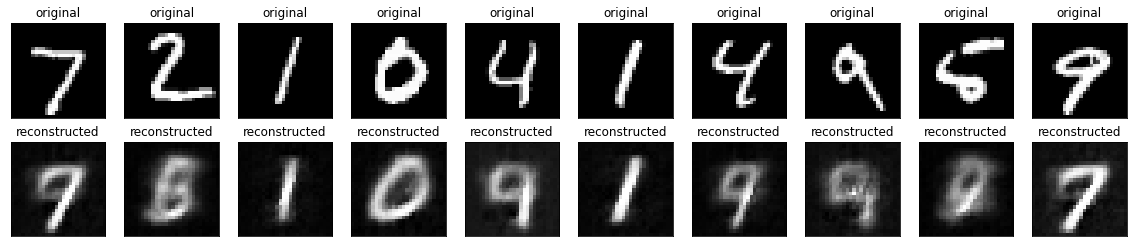

In [8]:
encoded_imgs = encoder(x_test).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()



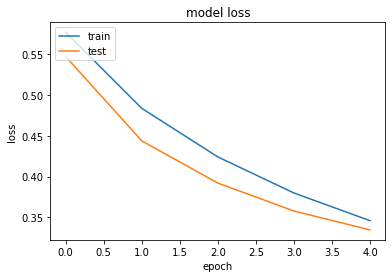

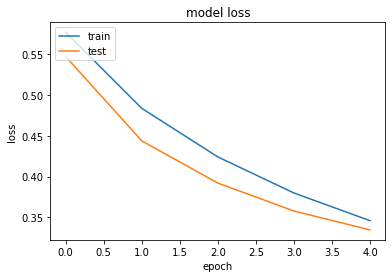

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
#Model 2

#parameters for model 2
H = 28
W = 28
C = 1
dim = 1

encoder_inputs = Input(shape=(H, W, C), name="orginal_inputs")
x = encoder_inputs
x = Conv2D(32, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Flatten()(x)
units = x.shape[1]
encoder_output = Dense(dim, name="latent")(x)

encoder = Model(encoder_inputs, encoder_output, name = "encoder")

decoder_input = Input(shape=(1,), name="encoded_img")
x = Dense(units)(decoder_input)
x = LeakyReLU(alpha=0.2)(x)
x = Reshape((7, 7, 64))(x)

x = Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)

x = Conv2DTranspose(1, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("sigmoid", name="outputs")(x)

decoder_output = x

decoder = Model(decoder_input, decoder_output, name = "decoder")

autoencoder_input = tf.keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
print(encoded_img)
decoded_img = decoder(encoded_img)
print(decoded_img)
autoencoder2 = tf.keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder2.summary()


autoencoder2.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_path = "autoencoderCNN/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history2 = autoencoder2.fit(
    x_train,
    x_train,
    epochs=5,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test), callbacks=[cp_callback]
)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='encoder/latent/BiasAdd:0', description="created by layer 'encoder'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), name='decoder/outputs/Sigmoid:0', description="created by layer 'decoder'")
Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 1)                 22337     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         44037     
Total params: 66,374
Trainable params: 66,052
Non-trainable params: 322
_________________________________________________________________
Epoch 1/5
235/235 [==============================] - 118s 49

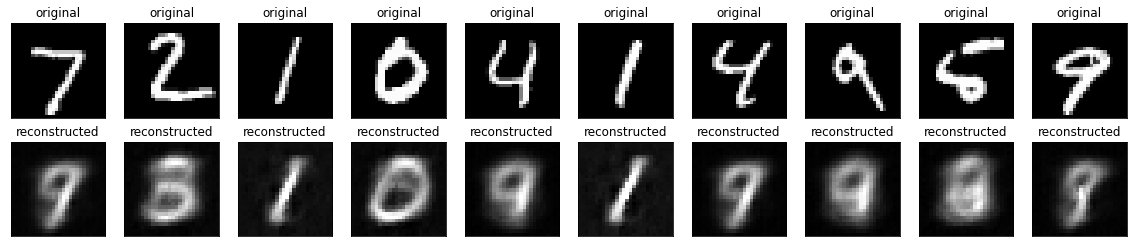

In [13]:
encoded_imgs = encoder(x_test).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
#Model 3

#parameters for model 2
H = 28
W = 28
C = 1
dim = 3

encoder_inputs = Input(shape=(H, W, C), name="orginal_inputs")
x = encoder_inputs
x = Conv2D(32, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)
x = MaxPool2D((2, 2))(x)

x = Flatten()(x)
units = x.shape[1]
encoder_output = Dense(dim, name="latent")(x)

encoder = Model(encoder_inputs, encoder_output, name = "encoder")

decoder_input = Input(shape=(3,), name="encoded_img")
x = Dense(units)(decoder_input)
x = LeakyReLU(alpha=0.2)(x)
x = Reshape((7, 7, 64))(x)

x = Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)

x = Conv2DTranspose(1, (3, 3), strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = Activation("sigmoid", name="outputs")(x)

decoder_output = x

decoder = Model(decoder_input, decoder_output, name = "decoder")

autoencoder_input = tf.keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
print(encoded_img)
decoded_img = decoder(encoded_img)
print(decoded_img)
autoencoder3 = tf.keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder3.summary()


autoencoder3.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_path = "autoencoderCNN/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history3 = autoencoder3.fit(
    x_train,
    x_train,
    epochs=5,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test), callbacks=[cp_callback]
)



KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='encoder/latent/BiasAdd:0', description="created by layer 'encoder'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), name='decoder/outputs/Sigmoid:0', description="created by layer 'decoder'")
Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 3)                 28611     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         50309     
Total params: 78,920
Trainable params: 78,598
Non-trainable params: 322
_________________________________________________________________
Epoch 1/5
235/235 [==============================] - 102s 43

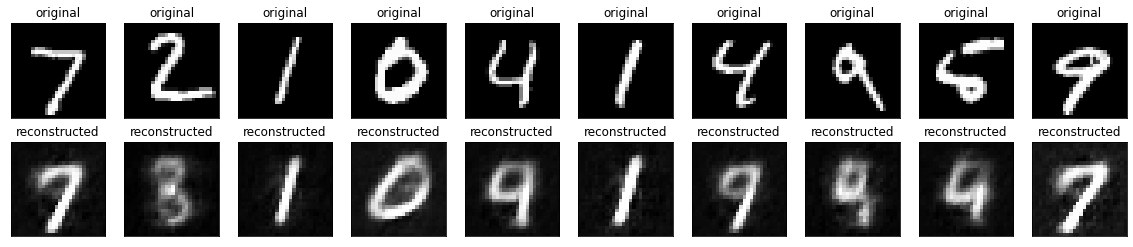

In [15]:
encoded_imgs = encoder(x_test).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()




From the above experiment , we see that as the bottleneck size increases 
from 1 to 3 the quality of reconstructed image increases. Now lOOKING AT T
HE ABOVE THREE MODELS, ONE CAN INFER THAT THE BOTTLENECK OF SIZE 2
IS THE IDEAL SIZE FOR THIS DATASET BECUASE THE TRADE OFF BETWEEN THE QUALITY OF
RECONSTRUCTED IMAGE AND THE COMPRESSION RATIO OF THE ORGINAL IMAGE IS RELATIVELY 
BETTER THAN OTHER BOTTLENECK SIZE